In [60]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [61]:
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {desc[0]: desc[1](mol) for desc in Descriptors._descList}
    else:
        return {desc[0]: None for desc in Descriptors._descList}

# Replace the file path with your actual data file path
data_path = 'tested_molecules.csv'
data = pd.read_csv(data_path)
data['descriptors'] = data['SMILES'].apply(calculate_descriptors)
descriptors_df = pd.DataFrame(data['descriptors'].tolist())
descriptors_df.fillna(descriptors_df.mean(), inplace=True)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(descriptors_df)


In [62]:
def analyze_inhibition(target):
    y = data[target].values
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Random Forest model
    forest = RandomForestClassifier(n_estimators=100, random_state=42)
    forest.fit(X_train, y_train)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]

    print(importances[indices[:10]])

    # Visualize Feature Importances
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances for {target}")
    plt.bar(range(10), importances[indices[:10]], align='center')
    plt.xticks(range(10), [descriptors_df.columns[i] for i in indices[:10]], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

    # Calculate and print confusion matrix and accuracy
    y_pred = forest.predict(X_test)
    print(f"Confusion Matrix for {target}:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Accuracy for {target}: {accuracy_score(y_test, y_pred)}\n")


[0.02017762 0.01876131 0.01847953 0.01619999 0.01618396 0.01493501
 0.01458167 0.01452368 0.01451667 0.01412835]


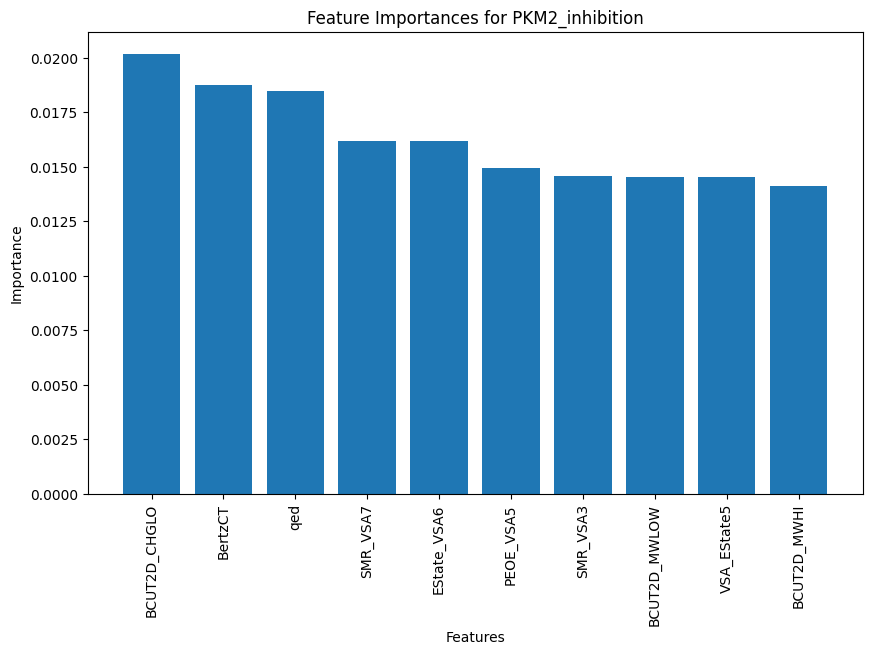

Confusion Matrix for PKM2_inhibition:
[[218   0]
 [  6   0]]
Accuracy for PKM2_inhibition: 0.9732142857142857



In [63]:
analyze_inhibition('PKM2_inhibition')


[0.01794856 0.01707199 0.01655153 0.01564998 0.01538079 0.01535301
 0.0153077  0.01507213 0.01436841 0.01436626]


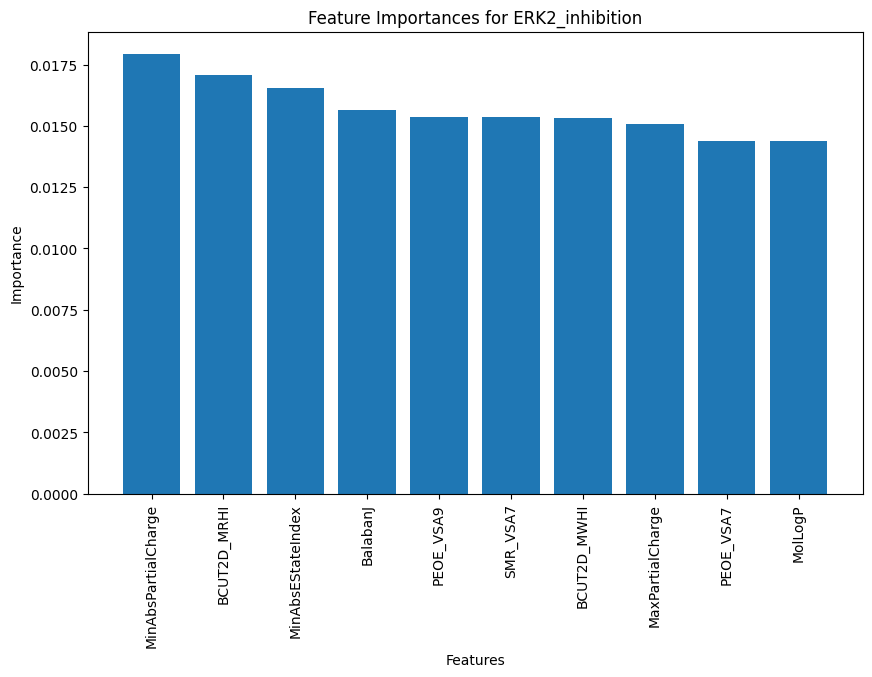

Confusion Matrix for ERK2_inhibition:
[[208   0]
 [ 16   0]]
Accuracy for ERK2_inhibition: 0.9285714285714286



In [64]:
analyze_inhibition('ERK2_inhibition')
